In [16]:
#Imports needed
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

In [14]:
#Get the data boi
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

warnings.filterwarnings('ignore')
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('SELECT * FROM useducation', con = engine)

engine.dispose()

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [41]:
need_to_fill = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE',
             'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
            'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 
            'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 
            'GRADES_9_12_G', 'GRADES_ALL_G']
for col in need_to_fill:
    df.loc[:,col] = df.loc[:,col].interpolate()
    
df.dropna(inplace = True)

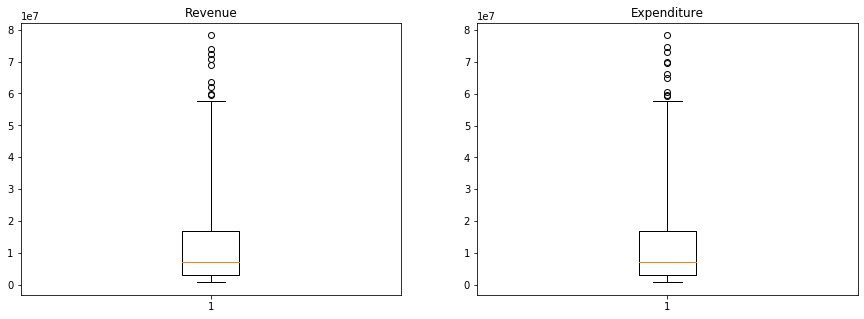

In [43]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.boxplot(df['TOTAL_REVENUE'], whis = 3)
plt.title('Revenue')

plt.subplot(1,2,2)
plt.boxplot(df['TOTAL_EXPENDITURE'], whis = 3)
plt.title('Expenditure')
plt.show()







# Hella outlier values

In [46]:
win_rev = winsorize(df['TOTAL_REVENUE'], (0, .05))
win_exp = winsorize(df['TOTAL_EXPENDITURE'], (0, .05))

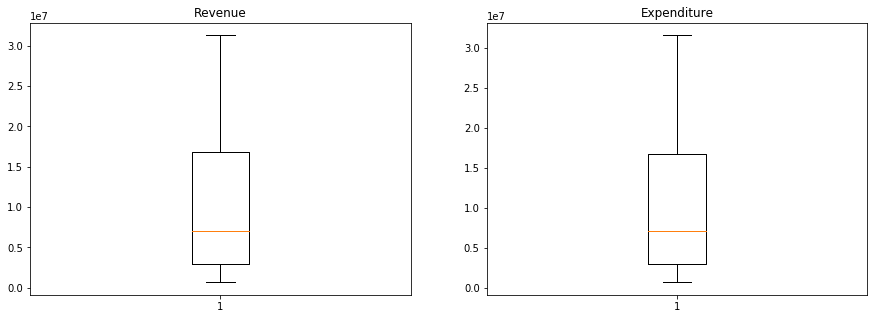

In [48]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.boxplot(win_rev)
plt.title('Revenue')

plt.subplot(1,2,2)
plt.boxplot(win_exp)
plt.title('Expenditure')
plt.show()

In [49]:
##SICK

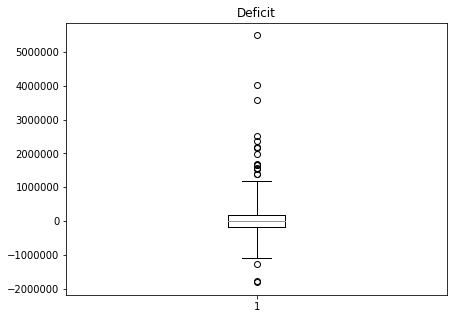

In [64]:
#3
deficit = df['TOTAL_EXPENDITURE']- df['TOTAL_REVENUE']


plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
plt.boxplot(deficit, whis = 3)
plt.title('Deficit')
plt.show()

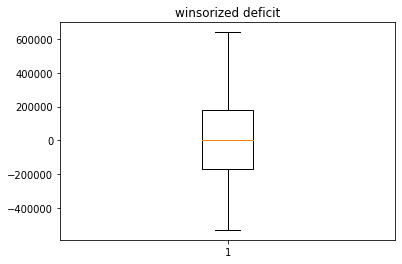

In [69]:
win_def = winsorize(deficit, (.05, .075))


plt.boxplot(win_def)
plt.title('winsorized deficit')
plt.show()

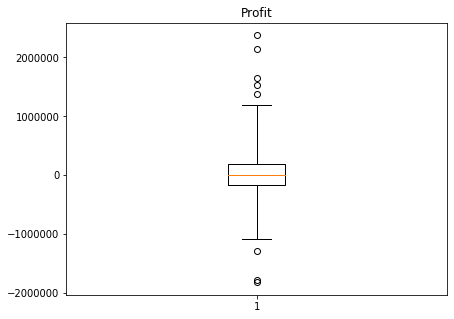

In [70]:
#4
mt_pro = win_exp - win_rev
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
plt.boxplot(mt_pro, whis = 3)
plt.title('Profit')
plt.show()

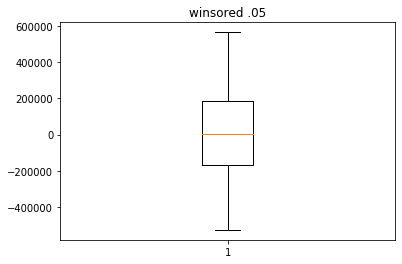

In [71]:
win_pro = winsorize(mt_pro, (.05, .05))
plt.boxplot(win_pro)
plt.title('winsored .05')
plt.show()

In [73]:
#5
all_data = pd.DataFrame({'Original':deficit, 'First':win_def, 'Second':win_pro})
all_data.describe()

,Original,First,Second
count,4.740000e+02,474.000000,474.000000
mean,5.267955e+04,6182.472574,-6024.430380
std,5.845854e+05,311828.482745,282842.446189
min,-1.816932e+06,-530090.000000,-525512.000000
25%,-1.692055e+05,-169205.500000,-165163.750000
50%,2.846500e+03,2846.500000,4396.500000
75%,1.811440e+05,181144.000000,184851.750000
max,5.487742e+06,640608.000000,563852.000000


# The second set seem to be less. This shows that eliminating variables twice affects the totals statistically






# For question 6, eliminating as little data is possible is ideal, so question 3's method would be better imo